In [65]:
import torch
from torch.autograd import Variable
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

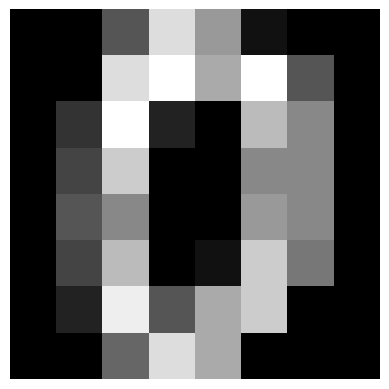

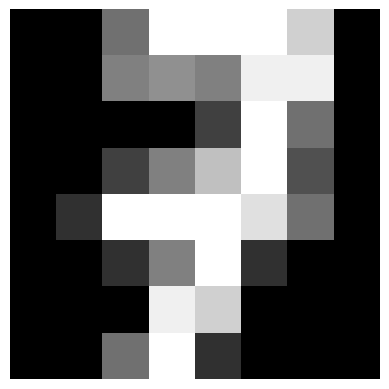

None


In [66]:
class MnistDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        slice_i = torch.tensor(np.take(self.data, indices=idx, axis=0), dtype=torch.float32)
        return slice_i

def show_bw_image(img_array):
    plt.imshow(img_array.reshape(8,8), cmap='gray')
    plt.axis('off')
    plt.show()

train_dataset = MnistDataset(load_digits().data[:1000])
val_dataset = MnistDataset(load_digits().data[1000:1500])
test_dataset = MnistDataset(load_digits().data[1500:])
show_bw_image(train_dataset[0])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False)
print(show_bw_image(next(iter(train_loader))[0]))

input_image


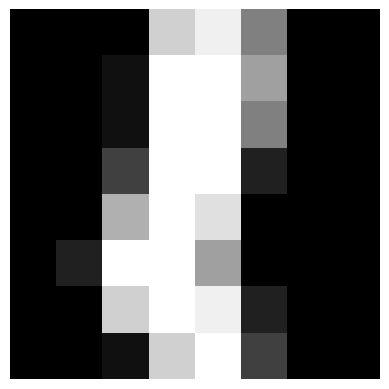

predicted_image


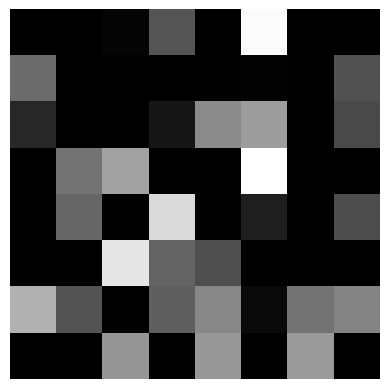

epoch 0, validation loss 45.83792002487183, train loss(49.38877514648438
epoch 1, validation loss 40.8245930480957, train loss(44.67442230224609
epoch 2, validation loss 36.30266778564453, train loss(39.65254406738281
epoch 3, validation loss 33.0850912361145, train loss(35.637418411254885
epoch 4, validation loss 30.986604358673095, train loss(32.89282864379883
epoch 5, validation loss 29.595320302963255, train loss(31.08901969909668
epoch 6, validation loss 28.673132860183717, train loss(29.898707061767578
epoch 7, validation loss 28.05624547767639, train loss(29.10714729309082
epoch 8, validation loss 27.589665399551393, train loss(28.5611004486084
epoch 9, validation loss 27.234895629882814, train loss(28.15479200744629
epoch 10, validation loss 26.921173122406007, train loss(27.828703079223633
epoch 11, validation loss 26.660384883880614, train loss(27.551309875488283
epoch 12, validation loss 26.415981897354126, train loss(27.301223403930663
epoch 13, validation loss 26.197028066

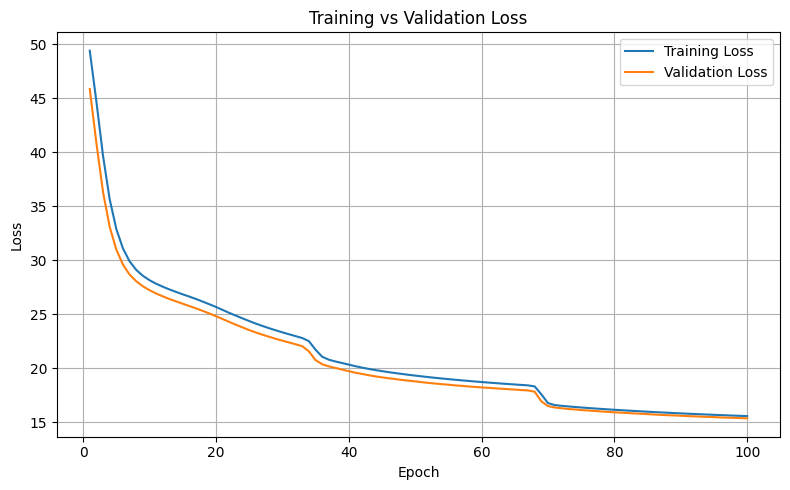

input_image


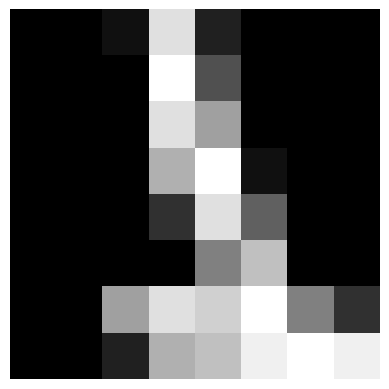

predicted_image


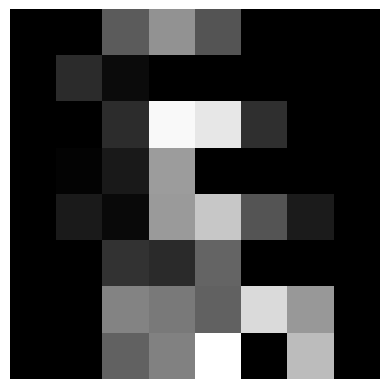

In [73]:
class simple_fc_autoencoder(torch.nn.Module):
    def __init__(self):
        super(simple_fc_autoencoder, self).__init__()
        self.fc1 = nn.Linear(64, 10)

        self.fc2 = nn.Linear(10, 64)

        self.relu = nn.ReLU()
        
    def forward(self, input):
        # print("x",x.shape,x)
        x = self.relu(self.fc1(input))
        x = self.relu(self.fc2(x))

        # print("x",x.shape,x)

        return x

def visualise_prediction(model, data,index = 0):
    raw_input = np.take(data, indices=index, axis=0)
    # print("raw_input",raw_input.shape,raw_input)
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking for efficiency
        input = torch.tensor(np.expand_dims(raw_input, axis=0), dtype=torch.float32)
        # print("input",input.shape,input)
        predicted_output = model(input).numpy()[0]
        # print("pred",predicted_output.shape,predicted_output)
        print("input_image")
        show_bw_image(raw_input)

        print("predicted_image")
        show_bw_image(predicted_output)

def plot_losses(val_losses,train_losses):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
def Validate(model, val_loader):
    criterion = nn.MSELoss()
    model.eval()
    losses = []
    with torch.no_grad():
        for batch in val_loader:
            input = batch
            outputs = model(input)
            loss = criterion(outputs, input)
            losses.append(loss.item())
    return np.mean(losses)
    
def Train(model,train_loader, val_loader, epochs,lr):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    gradients = []
    epoch_val_losses = []
    epoch_train_losses = []

    for epoch in range(epochs):
        model.train()
        losses = []
        for batch in train_loader:
            input = batch
            # print("input",input.shape)
            # print("target", target.shape)
            optimizer.zero_grad() #sets initial gradients to 0 for security purposes
        
            # get output from the model, given the inputs
            outputs = model(input)
            # print("x",x.shape, x)
            # print("output",outputs.shape, outputs)
            # print("target",target.shape, target)
            # # get loss for the predicted output
            loss = criterion(outputs, input)
            losses.append(loss.item())
            loss.backward()
            optimizer.step()
        epoch_val_losses.append(Validate(model, val_loader))
        epoch_train_losses.append(np.mean(losses))
        # print('epoch {}, loss {}'.format(epoch, loss.item()))
        print(f'epoch {epoch}, validation loss {epoch_val_losses[-1]}, train loss({epoch_train_losses[-1]}')

    plot_losses(epoch_val_losses,epoch_train_losses)  


    
learning_rate = 0.0001
num_epochs = 100

model = simple_fc_autoencoder()
visualise_prediction(model,next(iter(train_loader)))
Train(model,train_loader, val_loader, num_epochs,learning_rate)
visualise_prediction(model,next(iter(val_loader)))


input_image


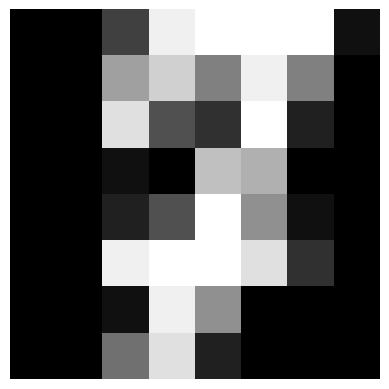

predicted_image


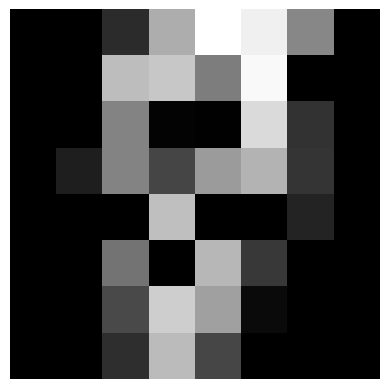

input_image


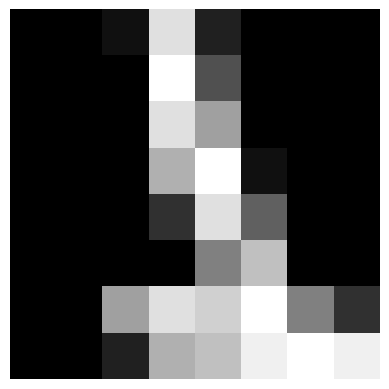

predicted_image


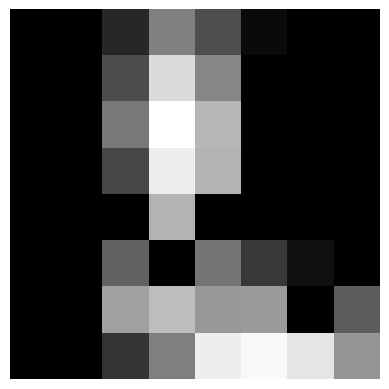

In [70]:
visualise_prediction(model,next(iter(train_loader)))
# Train(model,train_loader, val_loader, num_epochs,learning_rate)
visualise_prediction(model,next(iter(val_loader)))